# Objective:

In this project, we'll work with data from the CIA World Factbook, a compendium of statistics about all of the countries on Earth. The Factbook contains demographic information like:

population - The population as of 2015.
population_growth - The annual population growth rate, as a percentage.
area - The total land and water area.

# Instructions: 

1. Download facebook.db data from https://github.com/nidhikumra/nkumra-elu/blob/master/M3W1_workshop/factbook.db
Save it in same folder as your notebook
2. Import pandas and sqlite3.
3. Connect to factbook.db using sqllite3 and use pandas.read_sql_query() to return information on the tables in the database.
4. Write and run another query that returns the first 5 rows of the facts table in the database.

In [27]:
import pandas as pd
import sqlite3 as sql
import numpy as np


In [8]:
conn=sql.connect('factbook.db')

In [9]:
query = ("SELECT * FROM sqlite_master WHERE type='table'")

In [10]:
df1=pd.read_sql_query(query,conn)

In [11]:
df1

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
2,table,cities,cities,2,CREATE TABLE cities (\n id integer prim...


In [12]:
q2='select * from facts'
df2=pd.read_sql_query(q2,conn)
df2.head()

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230.0,652230.0,0.0,32564342.0,2.32,38.57,13.89,1.51
1,2,al,Albania,28748.0,27398.0,1350.0,3029278.0,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741.0,2381741.0,0.0,39542166.0,1.84,23.67,4.31,0.92
3,4,an,Andorra,468.0,468.0,0.0,85580.0,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700.0,1246700.0,0.0,19625353.0,2.78,38.78,11.49,0.46


# Basic SQL query structure
<img src="basic_sql_query_structure.png">

#### 1. Create summary statistics for population & population growth columns, i.e. min, max, and average

In [14]:
q3 = '''
select min(population) min_pop, max(population) max_pop, avg(population) as avg_pop
,min(population_growth) min_pop_grwth, max(population_growth) max_pop_grwth , avg(population_growth) as avg_pop_grwth
from facts
'''
pd.read_sql_query(q3, conn)

,min_pop,max_pop,avg_pop,min_pop_grwth,max_pop_grwth,avg_pop_grwth
0,0,7256490011,6.209493e+07,0.0,4.02,1.200975


#### 2. Find the records with minimum and maximum population

In [ ]:
q4 = '''
select *
from facts
where population == (select max(population) from facts);
'''

pd.read_sql_query(q4, conn)

In [ ]:
q5 = '''
select *
from facts
where population == (select min(population) from facts);
'''

pd.read_sql_query(q5, conn)

#### 3.Plot HISTOGARM for population, population_growth, birth_rate, death_rate

In [16]:
q6 = '''
select population, population_growth, birth_rate, death_rate
from facts
where population != (select max(population) from facts)
and population != (select min(population) from facts);
'''
df6 = pd.read_sql_query(q6, conn)

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

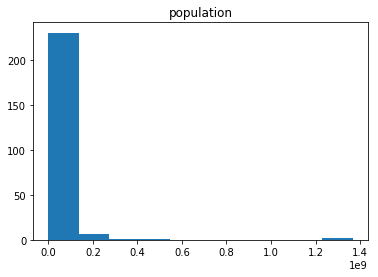

In [24]:
var='population'
plt.hist(df6[var])
plt.title(var)
plt.show()

In [48]:
import warnings
warnings.filterwarnings('ignore')

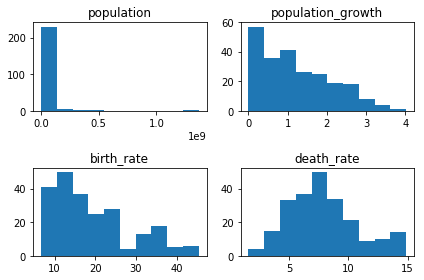

In [49]:
fig,axes=plt.subplots(2,2)
var=['population','population_growth', 'birth_rate', 'death_rate']
for i in np.arange(1,5):
    plt.subplot(2,2,i)
    plt.hist(df6[var[i-1]])
    plt.title(var[i-1])
plt.tight_layout()
plt.show()

#### 4. Find the top 5 countries in terms of population density

In [51]:
q7 = "select name, cast(population as float)/cast(area as float) density from facts order by density desc limit 20"
pd.read_sql_query(q7, conn).head(5)


,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444


#### 5. read top 5 rows of cities table

In [ ]:
q8 = "select * from cities"
pd.read_sql_query(q8, conn).head(5)

#### 6. Group the cities data to find population by fact ids and order by the descending population, show top 10

In [69]:
q9 = "select facts_id,sum(population) as sum_population from cities group by facts_id order by sum_population desc"
pd.read_sql_query(q9, conn).head(10)

,facts_id,sum_population
0,77,82035000
1,37,66849000
2,186,60116000
3,85,60077000
4,24,38086000
5,114,33449000
6,132,29338000
7,14,23343000
8,129,23118000
9,179,22753000


#### 7. Group the cities data to find population by fact ids and order by the descending population, display once about 50m

In [70]:
q10 = "select facts_id,sum(population) as sum_population from cities group by facts_id having sum_population>50000000 order by sum_population desc"
pd.read_sql_query(q10, conn)

,facts_id,sum_population
0,77,82035000
1,37,66849000
2,186,60116000
3,85,60077000


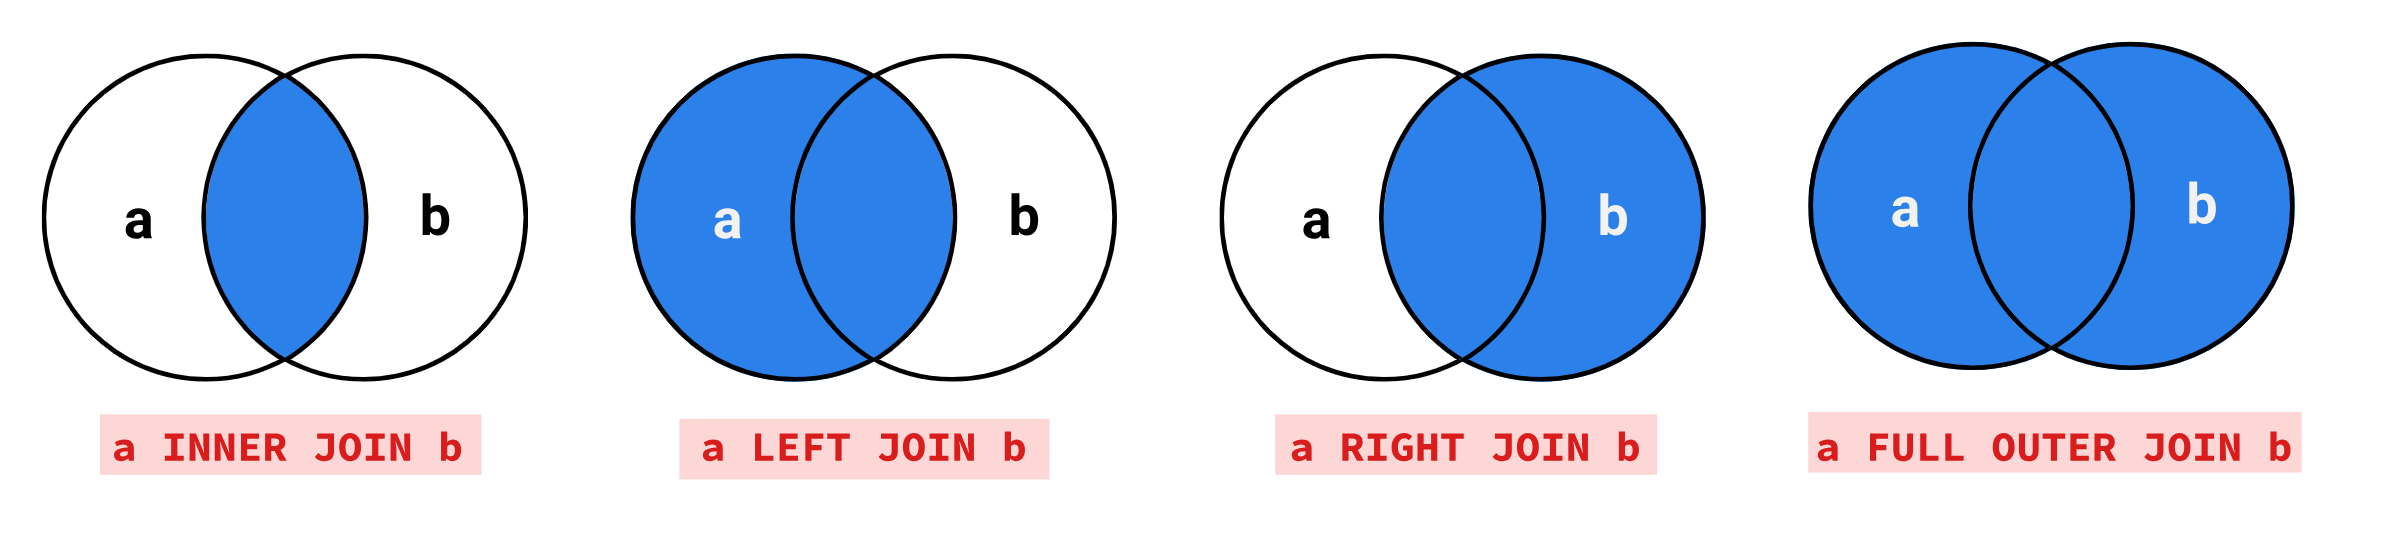

In [51]:
from IPython.display import Image
Image("joins.png")

In [ ]:
##Write a query that:
Joins cities to facts using an INNER JOIN on id
Uses aliases for table names.
Includes, in order:
All columns from cities.
The name column from facts aliased to country_name.
Includes only the first 5 rows.

In [ ]:
Write a query that returns the countries that don't exist in cities:
Your query should return two columns:
The country names, with the alias country.
The country population.
Use a LEFT JOIN to join cities to facts.
Include only the countries from facts that don't have a corresponding value in cities.

In [ ]:
Using a join and a subquery, write a query that returns capital cities with populations of over 10 million ordered from largest to smallest. Include the following columns:
capital_city - the name of the city.
country - the name of the country the city is the capital of.
population - the population of the city.

In [ ]:
The query to find the countries where the urban center (city) population is more than half of the country's total population.
The following columns, in order:
country, the name of the country.
urban_pop, the sum of the population in major urban areas belonging to that country.
total_pop, the total population of the country.
urban_pct, the percentage of the popularion within urban areas, calculated by dividing urban_pop by total_pop.
Only countries that have an urban_pct greater than 0.5.
Rows should be sorted by urban_pct in ascending order.